# 프로젝트 목차

#### 1. 데이터 읽기
    - 코로나 데이터 블러오고 DataFrame 구조 확인
    
#### 2. 데이터 정제
    - 비어있거나 쓸모없는 데이터 삭제
    
#### 3. 데이터 시각화

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
from os import name
import xml.etree.ElementTree as et
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [69]:
##### open API 활용 신청
# 공공데이터포털에서 보건복지부 코로나19 감염 현황 데이터 활용 신청하기

#인증키 입력
encoding = '발급받은 인코딩 인증키'
decoding = '발급받은 디코딩 인증키'

# url 이해하기
"""
url : API명
serviceKey : 위 상세 페이지에서 발급받은 String 값
pageNo : 페이지 번호
numOfRows : 페이지 내 결과 수
startCreateDt : 검색시작일(YYYYMMDD)
endCreateDt : 검색종료일(YYYYMMDD)
"""

# 2022년 2월 코로나 데이터
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
params ={'serviceKey' : decoding, 
         'pageNo' : '1',
         'numOfRows' : '10',
         'startCreateDt' : '20220217',
         'endCreateDt' : '20220217' }

response = requests.get(url, params=params)
          
#xml 내용
content = response.text

#깔끔한 출력을 위한 코드
p=pprint.PrettyPrinter(indent=4)

In [70]:
### xml을 dataframe으로 변환하기


## 각 컬럼의 값
"""
SEQ : 게시글번호(국내 시도별 발생현황 고유값)
CREATE_DT: 	등록일시분초
DEATH_CNT: 	사망자 수
GUBUN: 	시도명(한글)
GUBUN_CN: 	시도명(중국어)
gubunEn: 시도명(영어)
INC_DEC: 전일대비 증감 수
ISOL_CLEAR_CNT: 격리 해제 수
QUR_RATE: 10만명당 발생률
STD_DAY: 기준일시
UPDATE_DT: 수정일시분초
DEF_CNT: 확진자 수
ISOL_ING_CNT: 격리중 환자수
OVER_FLOW_CNT: 해외유입 수
LOCAL_OCC_CNT: 지역발생 수
"""

#bs4 사용하여 item태그 분리
xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><createDt>2022-02-17 08:53:19.805</createDt><deathCnt>16</deathCnt><defCnt>9395</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>38</incDec><isolClearCnt>8451</isolClearCnt><localOccCnt>0</localOccCnt><overFlowCnt>38</overFlowCnt><qurRate>-</qurRate><seq>15171</seq><stdDay>2022년 02월 17일 00시</stdDay><updateDt>null</updateDt></item>, <item><createDt>2022-02-17 08:53:19.805</createDt><deathCnt>14</deathCnt><defCnt>12551</defCnt><gubun>제주</gubun><gubunCn>济州</gubunCn><gubunEn>Jeju</gubunEn><incDec>882</incDec><isolClearCnt>8470</isolClearCnt><localOccCnt>882</localOccCnt><overFlowCnt>0</overFlowCnt><qurRate>1855</qurRate><seq>15170</seq><stdDay>2022년 02월 17일 00시</stdDay><updateDt>null</updateDt></item>, <item><createDt>2022-02-17 08:53:19.805</createDt><deathCnt>127</deathCnt><defCnt>64197</defCnt><gubun>경남</gubun><gubunCn>庆南</gubunCn><gubunEn>Gyeongsangnam-do</gubunEn><incDec>4481</incDec><isolClearCnt>40504</isolClearCnt><localOccCnt>4477</localOcc

In [71]:
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]

In [72]:
#xml값 DataFrame으로 만들기
corona_df = pd.DataFrame(row_list, columns=name_list)
print(corona_df.head(19))

                   createDt deathCnt   defCnt gubun gubunCn  \
0   2022-02-17 08:53:19.805       16     9395    검역     隔離區   
1   2022-02-17 08:53:19.805       14    12551    제주      济州   
2   2022-02-17 08:53:19.805      127    64197    경남      庆南   
3   2022-02-17 08:53:19.805      261    50753    경북      庆北   
4   2022-02-17 08:53:19.804       49    29963    전남      全南   
5   2022-02-17 08:53:19.804      146    39317    전북      全北   
6   2022-02-17 08:53:19.804      223    54506    충남      忠南   
7   2022-02-17 08:53:19.804      141    34107    충북      忠北   
8   2022-02-17 08:53:19.803      126    31379    강원      江原   
9   2022-02-17 08:53:19.803     2301   500738    경기      京畿   
10  2022-02-17 08:53:19.803        4     8417    세종      世宗   
11  2022-02-17 08:53:19.803       67    21251    울산      蔚山   
12  2022-02-17 08:53:19.802      211    38613    대전      大田   
13  2022-02-17 08:53:19.802      109    38040    광주      光州   
14  2022-02-17 08:53:19.802      366   110600    인천    

In [73]:
### 필요없는 데이터 삭제
# 열 기준 삭제는 axis=1, 원래 df를 그대로 사용하려면 inplace=True 사용
corona_sample = corona_df.drop(['createDt', 'gubunCn', 'gubunEn', 'seq', 'updateDt'], axis=1)
corona_sample.head(5)

,deathCnt,defCnt,gubun,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,16,9395,검역,38,8451,0,38,-,2022년 02월 17일 00시
1,14,12551,제주,882,8470,882,0,1855,2022년 02월 17일 00시
2,127,64197,경남,4481,40504,4477,4,1937,2022년 02월 17일 00시
3,261,50753,경북,2901,18804,2898,3,1932,2022년 02월 17일 00시
4,49,29963,전남,1893,6928,1892,1,1635,2022년 02월 17일 00시


In [74]:
corona_sample.rename(columns={'deathCnt':'사망자 수', 
                              'defCnt':'확진자 수',
                              'gubun':'시도명',
                              'incDec':'전일 대비 증감 수',
                              'isolClearCnt':'격리중 환자수', 
                              'localOccCnt':'지역발생 수',
                              'overFlowCnt':'해외유입 수',
                              'qurRate':'10만명당 발생률',
                              'stdDay':'기준일시'}, inplace=True)
corona_sample.columns

Index(['사망자 수', '확진자 수', '시도명', '전일 대비 증감 수', '격리중 환자수', '지역발생 수', '해외유입 수',
       '10만명당 발생률', '기준일시'],
      dtype='object')

In [75]:
corona_sample.head()

,사망자 수,확진자 수,시도명,전일 대비 증감 수,격리중 환자수,지역발생 수,해외유입 수,10만명당 발생률,기준일시
0,16,9395,검역,38,8451,0,38,-,2022년 02월 17일 00시
1,14,12551,제주,882,8470,882,0,1855,2022년 02월 17일 00시
2,127,64197,경남,4481,40504,4477,4,1937,2022년 02월 17일 00시
3,261,50753,경북,2901,18804,2898,3,1932,2022년 02월 17일 00시
4,49,29963,전남,1893,6928,1892,1,1635,2022년 02월 17일 00시


In [76]:
corona_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사망자 수       19 non-null     object
 1   확진자 수       19 non-null     object
 2   시도명         19 non-null     object
 3   전일 대비 증감 수  19 non-null     object
 4   격리중 환자수     19 non-null     object
 5   지역발생 수      19 non-null     object
 6   해외유입 수      19 non-null     object
 7   10만명당 발생률   19 non-null     object
 8   기준일시        19 non-null     object
dtypes: object(9)
memory usage: 1.5+ KB


In [77]:
# 데이터 전처리
corona_sample['기준일시']

0     2022년 02월 17일 00시
1     2022년 02월 17일 00시
2     2022년 02월 17일 00시
3     2022년 02월 17일 00시
4     2022년 02월 17일 00시
5     2022년 02월 17일 00시
6     2022년 02월 17일 00시
7     2022년 02월 17일 00시
8     2022년 02월 17일 00시
9     2022년 02월 17일 00시
10    2022년 02월 17일 00시
11    2022년 02월 17일 00시
12    2022년 02월 17일 00시
13    2022년 02월 17일 00시
14    2022년 02월 17일 00시
15    2022년 02월 17일 00시
16    2022년 02월 17일 00시
17    2022년 02월 17일 00시
18    2022년 02월 17일 00시
Name: 기준일시, dtype: object

In [78]:
month = []
day = []

# split함수 이용 월/일 나누기
for data in corona_sample['기준일시']:
    month.append(data.split(" ")[1][0:2])
    day.append(data.split(" ")[2][0:2])

In [79]:
#데이터프레임에 column생성해서 month, day 데이터 가져오기, 기준일시 삭제
corona_sample['월']=month
corona_sample['일']=day
corona_sample.drop(['기준일시'], axis=1, inplace=True)
corona_sample.head()

,사망자 수,확진자 수,시도명,전일 대비 증감 수,격리중 환자수,지역발생 수,해외유입 수,10만명당 발생률,월,일
0,16,9395,검역,38,8451,0,38,-,02,17
1,14,12551,제주,882,8470,882,0,1855,02,17
2,127,64197,경남,4481,40504,4477,4,1937,02,17
3,261,50753,경북,2901,18804,2898,3,1932,02,17
4,49,29963,전남,1893,6928,1892,1,1635,02,17


In [84]:
corona_sample=corona_sample.astype({'월':'int64', '일':'int64', '지역발생 수':'int64'})
corona_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 검역 to 합계
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사망자 수       19 non-null     object
 1   확진자 수       19 non-null     int64 
 2   전일 대비 증감 수  19 non-null     object
 3   격리중 환자수     19 non-null     object
 4   지역발생 수      19 non-null     int64 
 5   해외유입 수      19 non-null     object
 6   10만명당 발생률   19 non-null     object
 7   월           19 non-null     int64 
 8   일           19 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 1.5+ KB


In [85]:
# 시도명을 인덱스로 변경
corona_sample.set_index('시도명', inplace=True)
corona_sample

KeyError: "None of ['시도명'] are in the columns"

<AxesSubplot:ylabel='시도명'>

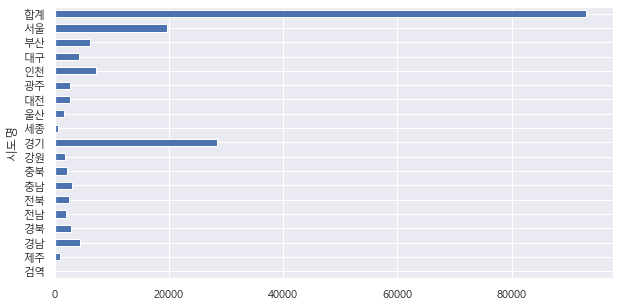

In [87]:
corona_sample['지역발생 수'].plot(kind='barh', figsize=(10,5), grid=True)